$$\min \sum_{i,j,k}i*j*k*X_{i,j,k}$$
Each cell is assigned with a color 
$$ \sum_{k}X_{i,j,k}=1$$ 
Each column has color k only one time 
$$ \sum_{i}X_{i,j,k}=1$$
Each row has color k only one time 
$$ \sum_{j}X_{i,j,k}=1$$

In [1]:
from pyomo.environ import *
import matplotlib.pyplot as plt
cmap = plt.cm.tab20  
cmap = [cmap(i) for i in range(20)]


print(cmap)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.6823529411764706, 0.7803921568627451, 0.9098039215686274, 1.0), (1.0, 0.4980392156862745, 0.054901960784313725, 1.0), (1.0, 0.7333333333333333, 0.47058823529411764, 1.0), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0), (0.596078431372549, 0.8745098039215686, 0.5411764705882353, 1.0), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0), (1.0, 0.596078431372549, 0.5882352941176471, 1.0), (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0), (0.7725490196078432, 0.6901960784313725, 0.8352941176470589, 1.0), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0), (0.7686274509803922, 0.611764705882353, 0.5803921568627451, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.9686274509803922, 0.7137254901960784, 0.8235294117647058, 1.0), (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0), (0.7803921568627451, 0.78039215686

In [6]:
n=14
model = AbstractModel()
model.N =Param (initialize=n, mutable=True)
model.i = RangeSet(model.N)
model.j = Set(initialize=model.i)
model.k = Set(initialize=model.i)

model.x = Var(model.i,model.j,model.k, within=Binary)
model.OF = Var(within=NonNegativeReals)

def r_c1(model,i,k):
    return sum(model.x[i,j,k] for j in model.j)==1
model.C1=Constraint(model.i,model.k, rule=r_c1)

def r_c2(model,j,k):
    return sum(model.x[i,j,k] for i in model.i)==1
model.C2=Constraint(model.j,model.k, rule=r_c2)

def r_c3(model,i,j):
    return sum(model.x[i,j,k] for k in model.k)==1
model.C3=Constraint(model.i,model.k, rule=r_c3)

def r_OF(model):
    return model.OF==sum(i*j*k*model.x[i,j,k] for i in model.i for j in model.j for k in model.k)
model.C4=Constraint( rule=r_OF)

model.obj = Objective(expr=model.OF , sense=minimize)


In [7]:
opt = SolverFactory('glpk')
#opt.options["mipgap"] = 0.05
instance = model.create_instance()
results = opt.solve(instance) # solves and updates instance
if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
    print('feasible')
elif (results.solver.termination_condition == TerminationCondition.infeasible):
    print('infeasible')
else:
    print ('Solver Status:',  results.solver.status)

    mutable Param).  The linkage between this RangeSet and the original source
    data will be broken, so updating the data value in the future will not be
    reflected in this RangeSet.  To suppress this warning, explicitly convert
    the source data to a constant type (e.g., float, int, or immutable Param)
feasible


(0.35, 14.65, 0.35, 14.65)

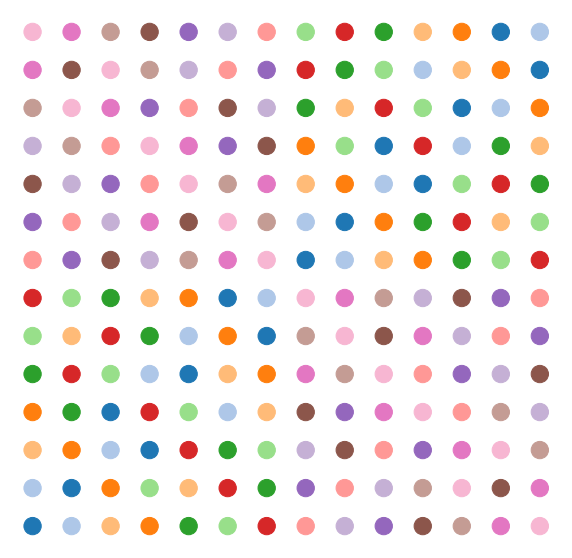

In [10]:
X=[]
Y=[]
K=[]
plt.figure(figsize=(10,10))
for i in instance.i:
    for j in instance.j:
        for k in instance.k:
            if value(instance.x[i,j,k]) >0.1:
                #print(i,j,k)
                X.append(i)
                Y.append(j)
                K.append(k)
Kn=[cmap[i-1] for i in K ]
plt.scatter(X,Y,s=300,c=Kn)
plt.axis('off')

(0.35, 14.65, 0.35, 14.65)

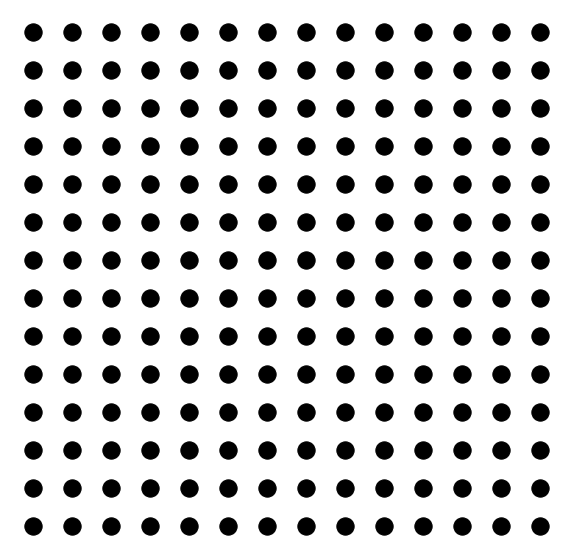

In [11]:
plt.figure(figsize=(10,10))
plt.scatter(X,Y,s=300,c='k')
plt.axis('off')